# **Principal Component Analysis (PCA)**

## Introduction to PCA

Principal component analysis, or PCA, is a dimensionality reduction method that is often used to reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set. Reducing the dimension of the dataset means reducing the number of independent variables. Reducing the number of variables of a data set naturally comes at the expense of accuracy, but the trick in dimensionality reduction is to trade a little accuracy for simplicity and computational efficiency. Because smaller data sets are easier to explore and visualize, and thus make analyzing data points much easier and faster for machine learning algorithms without extraneous variables to process. So, to sum up, the idea of PCA is simple: reduce the number of variables of a data set, while preserving as much information as possible.

PCA captures the underlying structure of the data by identifying the directions (principal components) along which the data varies the most. Here's what PCA captures:

1. Variance: PCA captures the directions of maximum variance in the data. The first principal component (PC1) accounts for the most significant amount of variance, followed by the second principal component (PC2), and so on. Each subsequent principal component captures progressively less variance.
2. Linear Relationships: PCA captures linear relationships between variables in the dataset. It identifies the directions in which the variables are most strongly correlated or inversely correlated, allowing it to summarize the data using a smaller number of components.
3. Dimensionality Reduction: PCA captures the essential information in the data while reducing its dimensionality. By retaining the top principal components that explain most of the variance, PCA can represent the data in a lower-dimensional space without losing much information.
4. Feature Extraction: PCA can be used for feature extraction by transforming the original features into a new set of uncorrelated features (principal components). These principal components are linear combinations of the original features and can be used in subsequent analyses or modeling tasks.
5. Noise Reduction: PCA can help reduce the impact of noise or irrelevant information in the data by focusing on the directions of maximum variance and ignoring directions with low variance (which often correspond to noise).
6. Visualization: PCA can be used for data visualization by projecting high-dimensional data onto a lower-dimensional space (e.g., 2D or 3D) while preserving the essential structure of the data. This allows for easier exploration and interpretation of the data.

In summary, PCA captures the underlying structure of the data by identifying the directions of maximum variance and representing the data in a lower-dimensional space while retaining most of the information. It is a powerful technique for dimensionality reduction, feature extraction, noise reduction, and visualization in various data analysis and machine learning tasks.

**Keep in mind that PCA is not an ML model.** It is a part of pre-processing the dataset before feeding it into an ML model.

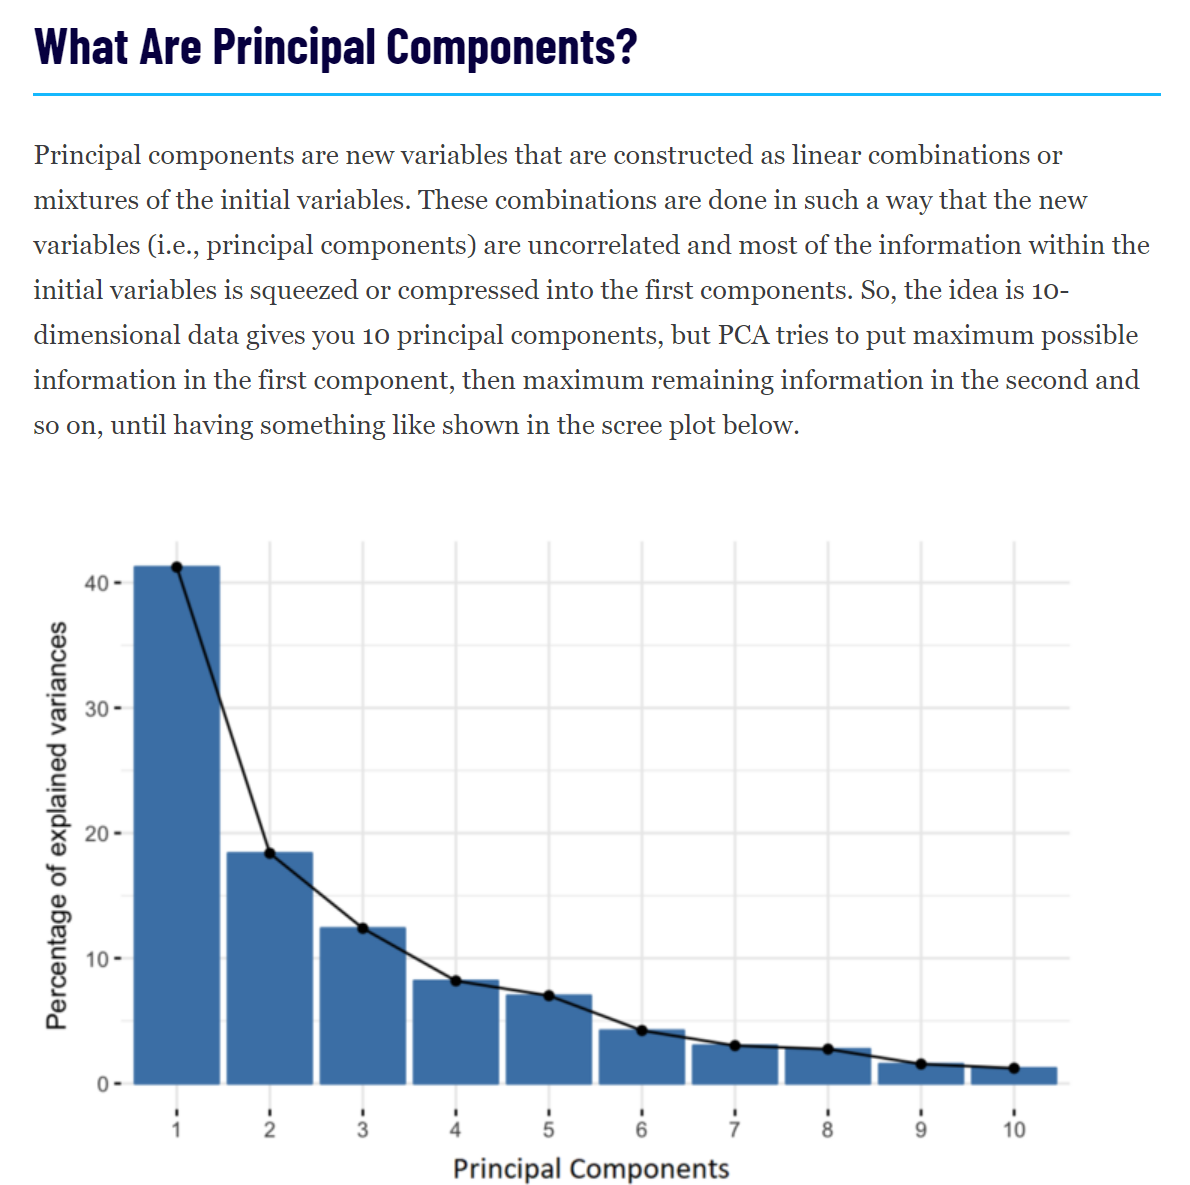

Source: https://builtin.com/data-science/step-step-explanation-principal-component-analysis

## Describing the Dataset

The dataset which I have used is has been downloaded from https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients.

It is a dataset of customers' default payments in Taiwan. There is so defined timeframe of the dataset except the information provided while elaborating on the variables below. Any and all info regarding the dataset is detailed below in the link provided below.

We will be using the same dataset as Logistic Regression. Our aim will be to reduce the dimension of the dependent variables from the initial 24.

The variables in the dataset are as follows.
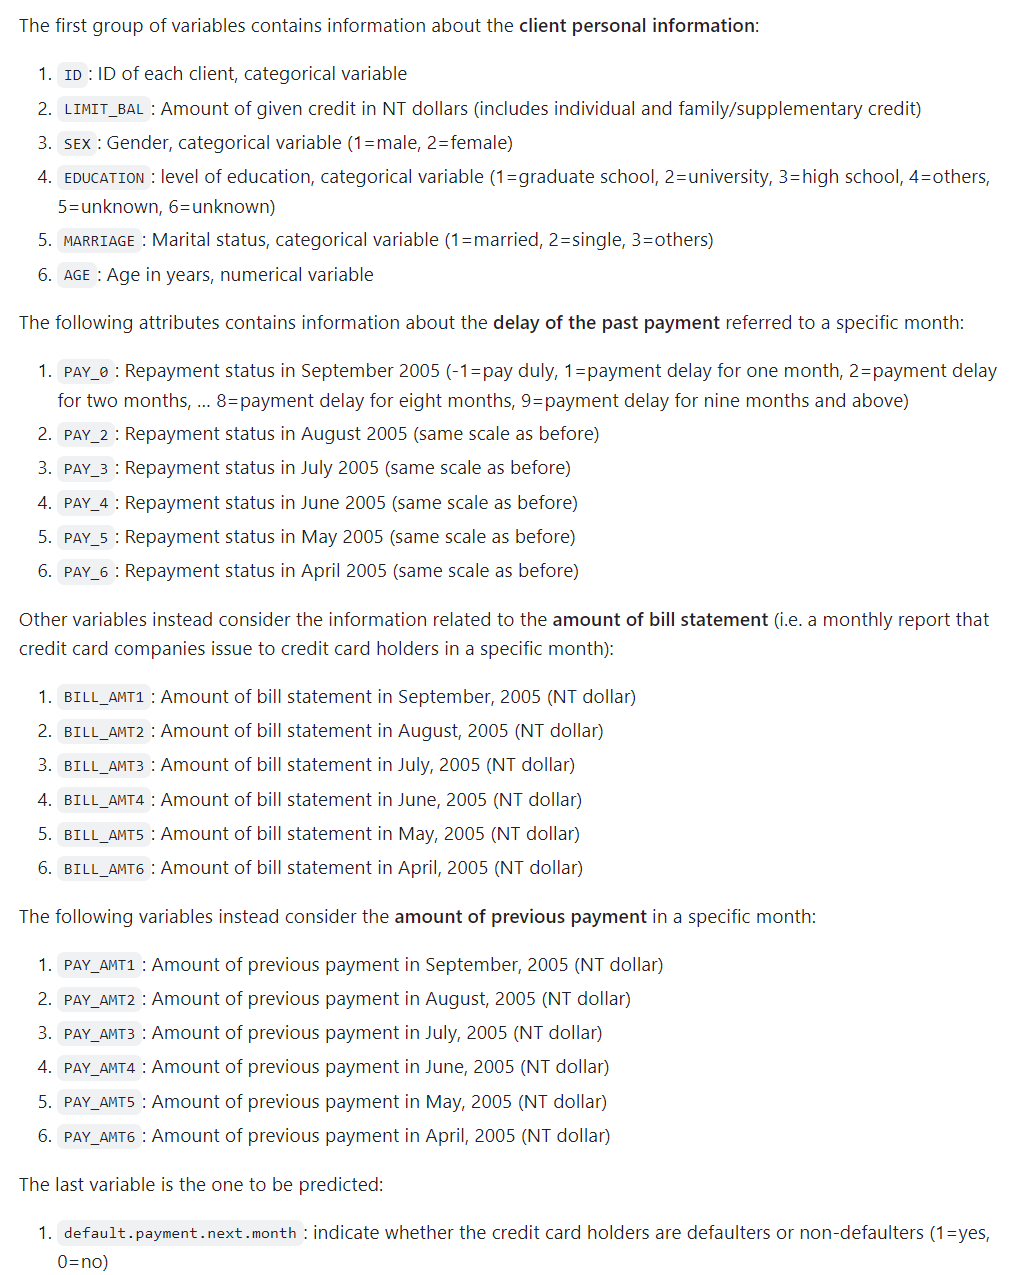![image.png]()


## Importing all the necessary libraries

In [67]:
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import pandas as pd

## Importing Data, Processing it and visualising it

In [68]:
df = pd.read_excel('/content/DefaultCC.xlsx')   #reading the data
df = df.drop(df[df['marriage'] == 0].index)     #cleaning the dataset
df = df.drop(df[df['education'] == 0].index)    #cleaning the dataset
df = df.drop(df[df['education'] == 5].index)    #cleaning the dataset
df = df.drop(df[df['education'] == 6].index)    #cleaning the dataset
df

,id,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,...,bill_4,bill_5,bill_6,pay_1.1,pay_2.1,pay_3.1,pay_4.1,pay_5.1,pay_6.1,dflt
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [69]:
# Let us drop the id column as it is irrelevant and after that let us plot a heatmap to view the correlation of each variable with the other
df_view = df.drop(['id'], axis=1).corr()
cmap = sns.diverging_palette(5, 250, as_cmap=True)
df_view.style.background_gradient(cmap, axis=1)\
    .format(precision=3)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})

,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_1,bill_2,bill_3,bill_4,bill_5,bill_6,pay_1.1,pay_2.1,pay_3.1,pay_4.1,pay_5.1,pay_6.1,dflt
limit_bal,1.000,0.025,-0.244,-0.110,0.144,-0.272,-0.297,-0.287,-0.268,-0.250,-0.237,0.284,0.277,0.282,0.293,0.295,0.290,0.196,0.178,0.211,0.203,0.217,0.220,-0.154
sex,0.025,1.000,0.012,-0.030,-0.091,-0.057,-0.071,-0.067,-0.061,-0.056,-0.045,-0.034,-0.032,-0.025,-0.023,-0.018,-0.018,0.000,-0.001,-0.009,-0.002,-0.002,-0.002,-0.040
education,-0.244,0.012,1.000,-0.148,0.187,0.124,0.143,0.136,0.129,0.116,0.104,0.005,0.001,-0.003,-0.014,-0.018,-0.015,-0.046,-0.039,-0.052,-0.043,-0.049,-0.054,0.049
marriage,-0.110,-0.030,-0.148,1.000,-0.418,0.018,0.023,0.032,0.032,0.035,0.035,-0.025,-0.023,-0.026,-0.024,-0.026,-0.022,-0.005,-0.008,-0.003,-0.014,-0.003,-0.006,-0.027
age,0.144,-0.091,0.187,-0.418,1.000,-0.039,-0.050,-0.053,-0.049,-0.053,-0.049,0.055,0.052,0.052,0.050,0.048,0.047,0.025,0.022,0.029,0.022,0.022,0.019,0.014
pay_1,-0.272,-0.057,0.124,0.018,-0.039,1.000,0.671,0.574,0.539,0.510,0.475,0.187,0.190,0.179,0.178,0.180,0.177,-0.080,-0.070,-0.071,-0.065,-0.060,-0.060,0.326
pay_2,-0.297,-0.071,0.143,0.023,-0.050,0.671,1.000,0.766,0.662,0.622,0.575,0.235,0.235,0.224,0.222,0.221,0.219,-0.081,-0.059,-0.056,-0.048,-0.038,-0.037,0.264
pay_3,-0.287,-0.067,0.136,0.032,-0.053,0.574,0.766,1.000,0.777,0.686,0.633,0.209,0.238,0.228,0.227,0.225,0.222,0.001,-0.067,-0.053,-0.047,-0.037,-0.037,0.235
pay_4,-0.268,-0.061,0.129,0.032,-0.049,0.539,0.662,0.777,1.000,0.820,0.717,0.203,0.226,0.245,0.246,0.243,0.239,-0.010,-0.002,-0.070,-0.044,-0.035,-0.027,0.216
pay_5,-0.250,-0.056,0.116,0.035,-0.053,0.510,0.622,0.686,0.820,1.000,0.817,0.207,0.227,0.243,0.271,0.269,0.262,-0.006,-0.003,0.008,-0.059,-0.035,-0.023,0.205


We can see alot of areas with strong correlations. Especailly between all pay_1 to pay_6 and bill_1 to bill_6. Hence we do not necessarily need all of these and can make do with some linear combination of them.

Splitting data into independent and dependent variables is a fundamental step in many types of statistical analysis and machine learning tasks, including regression analysis, classification, and forecasting. The purpose of this splitting is to prepare the data for modeling by separating the features or predictors (independent variables) from the target or response variable (dependent variable).

1. Model Building: In most statistical and machine learning models, we aim to build a relationship between the input variables (independent variables) and the output variable (dependent variable). By separating them, we can clearly define what we are trying to predict or explain.
2. Prediction: In predictive modeling tasks, the independent variables are used to make predictions about the dependent variable. Splitting the data allows us to train the model on one subset (training set) and evaluate its performance on another subset (testing set or validation set).
3. Generalization: By evaluating the model's performance on a separate dataset (testing set or validation set), we can assess its ability to generalize to new, unseen data. This is essential for determining whether the model has learned meaningful patterns or is simply memorizing the training data.
4. Feature Engineering: Splitting the data facilitates feature engineering, where we can preprocess, transform, or create new features based on the independent variables without affecting the dependent variable.

In summary, splitting data into independent and dependent variables is a crucial step in preparing data for modeling, enabling effective model building, evaluation, and generalization. It helps ensure that the model learns meaningful patterns from the data and can make accurate predictions or inferences on new, unseen data.

In our data, we have 24 independent variables(x, x1 to x24) and 1 dependent variable(y). This dependent variable is the "Dflt" column which tells us if the customer has defaulted on a loan or not. Hence, this is how we will split our dataset.

In [70]:
#storing the independent variable and dependent variables in separate dataframes
# indepenedt varies = 24 columns and dependent variable will have 1 column
df_x = df.iloc[: , :-1]
df_x = df.drop(['id'],axis=1)
df_y = df['dflt']
df_x

,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_4,bill_5,bill_6,pay_1.1,pay_2.1,pay_3.1,pay_4.1,pay_5.1,pay_6.1,dflt
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


## Implementing PCA and Visualising the Data

When performing PCA, the choice of the explained variance threshold, often denoted as 𝛼, such as 0.95, is based on the cumulative explained variance. The cumulative explained variance represents the proportion of total variance in the data (independent variables) captured by the principal components. Here's why 0.95 is often chosen:

1. Retaining Sufficient Information: By selecting a cumulative explained variance threshold of 0.95, we aim to retain at least 95% of the total variance in the original data. This ensures that the reduced-dimensional representation obtained through PCA preserves a large majority of the information present in the original dataset.
2. Dimensionality Reduction: PCA is commonly used for dimensionality reduction, where the goal is to reduce the number of features or variables while retaining as much information as possible. Choosing a threshold like 0.95 ensures that the reduced-dimensional representation captures a high proportion of the variability in the original data.
3. Trade-off Between Dimensionality and Information Loss: Selecting a threshold of 0.95 represents a trade-off between reducing dimensionality (i.e., reducing the number of principal components) and minimizing information loss. It strikes a balance between reducing computational complexity and retaining sufficient information for subsequent analyses or modeling tasks.
4. Common Practice: Choosing a threshold of 0.95 is a common practice in data analysis and machine learning. It provides a standardized criterion for determining the number of principal components to retain, making results more interpretable and comparable across different analyses.
5. Rule of Thumb: While the choice of threshold may vary depending on the specific requirements of the analysis or the characteristics of the data, 0.95 is often considered a reasonable default threshold in many applications. It provides a practical guideline for dimensionality reduction without sacrificing too much information.

In summary, selecting a threshold of 0.95 for PCA ensures that the reduced-dimensional representation retains a high proportion of the total variance in the original data, striking a balance between dimensionality reduction and information preservation.

In [71]:
# Setting explained variance threshold to 0.95
pca = PCA(0.95)
pca.fit(df_x)

PCA(n_components=0.95)

Visualising the Dataset in terms of it's new coordinates

In [73]:
#transforming data to pca coordinates
pca_coordinates = pca.transform(df_x)
pca_coordinates.shape

(29601, 4)

We see that around 95% of all information was captured in just 4 components! This is a huge reduction in the dimension from 24. Although we compromise on 5% of the information, we save up the memory and compute associated with 20 components.

In [74]:
#We notice from above that 4 features are enough to capture 95% of the information
label = ['PC' + str(x) for x in range(1,len(pca_coordinates[0])+1) ]
pca_df = pd.DataFrame(pca_coordinates, columns=label)
pca_df

,PC1,PC2,PC3,PC4
0,-166445.588229,-75187.239036,-418.721130,-116.598099
1,-113867.561211,9939.752352,2700.181180,-1584.654056
2,-98237.068483,-33370.855398,-2788.693839,-4988.239854
3,-71276.580530,-95220.462942,-10045.064628,4613.077575
4,-114743.107604,-68576.290424,25104.052320,34006.245847
...,...,...,...,...
29596,199888.640435,-56406.866313,-140884.813190,78756.164517
29597,-97265.675480,35189.450762,4735.917990,1667.356936
29598,-140134.595138,-77607.533810,26171.010819,-7519.987346
29599,-41375.591676,-75013.241253,18434.539380,44453.678609


Just as an added exercise, let us plot a graph to visualise the amount of information captured vs the number of principal components.

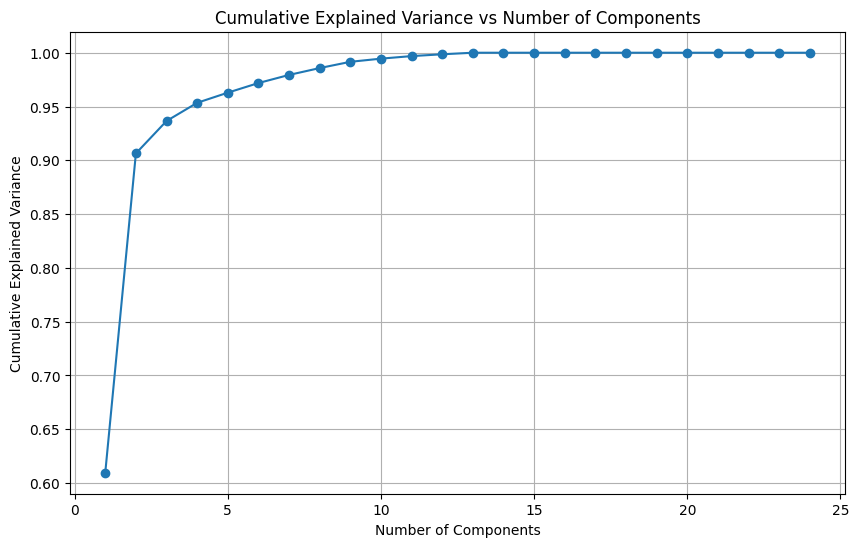

In [76]:
# Initialize PCA with desired number of components
pca = PCA()

# Fit PCA to the data
pca.fit(df_x)

# Calculate cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot cumulative explained variance versus number of components
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs Number of Components')
plt.grid(True)
plt.show()

## Conclusion

From the last graph, we see that 1 principal component (it is a linear combination of some subset of the original independent variables) is enough to capture almost 90% of the variance in the data. 4 principal components are enough to capture around 95% of the data and around 13 are enough to capture alost 100% of the information in the data. So basically the last 11 components are almost inconsequential in capturing information.

Let us also state the pros and cons of PCA to be clear about them.

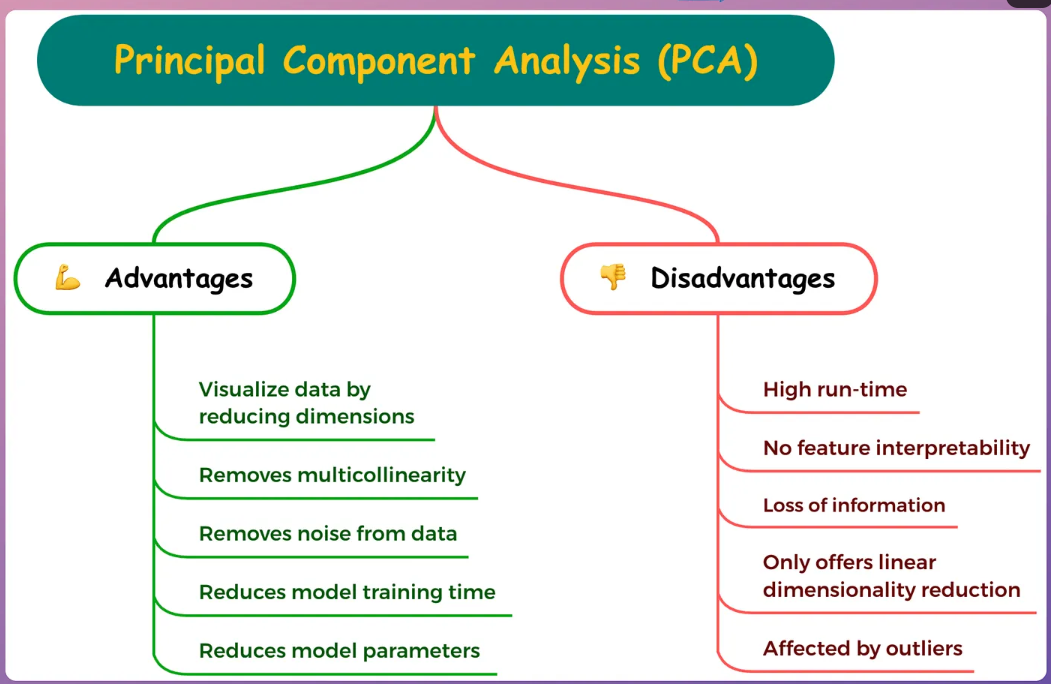

Source: https://www.blog.dailydoseofds.com/p/the-advantages-and-disadvantages